# 1. Logistic Regression and Regularization 

- regulerisasi dalam supervised learning digunakan untuk mengatasi overfitting dengan membut koefisien model yang lebih kecil. 
- dalam scikit learn, hyperparameter C adalah inverse dari regularisasi
    - Semakin besar nilai C maka semakin sedikit Regularisasi
- Regularisasi dapat mempengaruhi uji akurasi model dengan beberapa cara, tergantung pada jenis regularisasi yang digunakan (misalnya, L1 atau L2 regularization) dan seberapa kuat pengaruhnya dalam pembentukan model.
- dampak regularisasi pada uji akurasi sangat bergantung pada seberapa baik hiperparameter terpilih dan jenis regularisasi yang digunakan. Terkadang, model tanpa regularisasi dapat cenderung overfit dan menghasilkan akurasi yang lebih rendah pada data uji. Dengan menerapkan regularisasi dengan bijak, Anda dapat meningkatkan kemampuan model untuk menghasilkan prediksi yang lebih akurat dan generalisasi yang lebih baik pada data yang belum terlihat sebelumnya.

### Exercise 

**Regularized logistic regression**

In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

- Loop over the different values of C_value, creating and fitting a LogisticRegression model each time.
- Save the error on the training set and the validation set for each model.
- Create a plot of the training and testing error as a function of the regularization parameter, C.
- Looking at the plot, what's the best value of C?



In [5]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

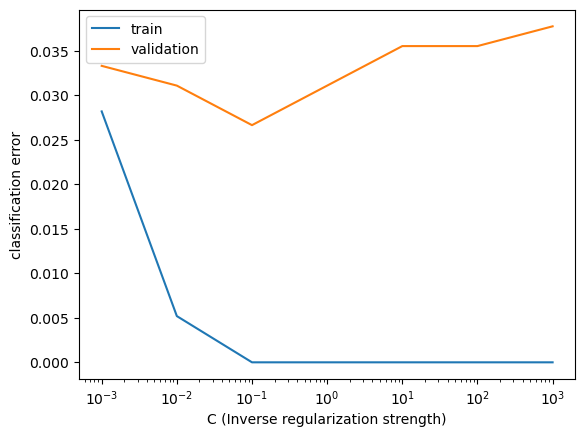

In [4]:
# Train and validation errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=10000)
    lr.fit(X_train, y_train)
    
    # Evalueate error rates and append to lists
    train_errs.append(1.0 - lr.score(X_train, y_train))
    valid_errs.append(1.0 - lr.score(X_valid, y_valid))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs);
plt.ylabel('classification error')
plt.xlabel('C (Inverse regularization strength)')
plt.legend(("train", "validation"));

 > Congrats! As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.

**Logistic regression and feature selection**

In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.

- Instantiate a logistic regression object that uses L1 regularization.
- Find the value of C that minimizes cross-validation error.
- Print out the number of selected features for this value of C.

In [9]:
from sklearn.datasets import load_svmlight_file
import numpy as np

X_train, y_train = load_svmlight_file('./dataset/train/labeledBow.feat')
y_train[y_train < 5] = -1.0
y_train[y_train >= 5] = 1.0

In [10]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (select features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 89527
Number of selected features: 1106


> Great job! As you can see, a whole lot of features were discarded here.

**Identifying the most positive and negative words**

In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

- Find the words corresponding to the 5 largest coefficients.
- Find the words corresponding to the 5 smallest coefficients.

In [12]:
import pandas as pd

In [13]:
vocab = pd.read_csv('./dataset/vocab.csv').to_numpy()

In [14]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

In [15]:
# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: ['excellent'], ['refreshing'], ['wonderfully'], ['perfect'], ['superb'], 

Most negative words: ['waste'], ['worst'], ['disappointment'], ['poorly'], ['awful'], 



> You got it! The answers sort of make sense, don't they?

### Logistic Regression Probabilities

- pada scikit learn, fungsi predict_proba digunakan untuk menampilkan probabilitas
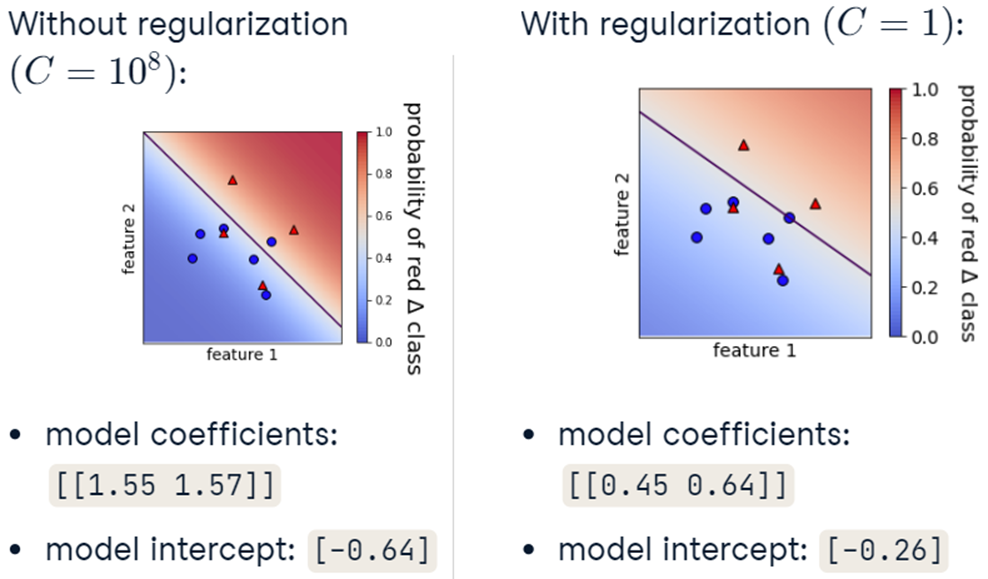


#### Bagaimana cara menghitung peluang pada Regresi Logistik

- prediksi regresi logistik adalah output raw model yang dapat berupa angka apapun
- probabilitas regresi logisitc adalah mengubah output raw model menjadi bernilai 0 sampai 1 melalui fungsi sigmoid
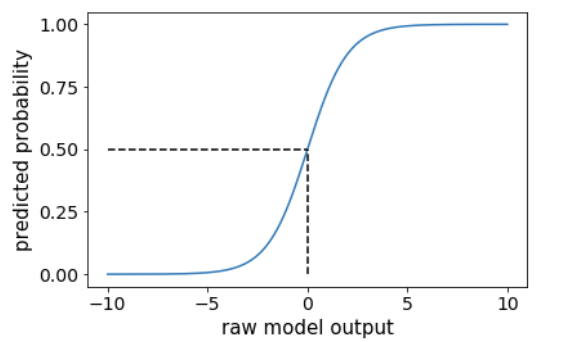


### Exercise 

**Getting class probabilities**

Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?

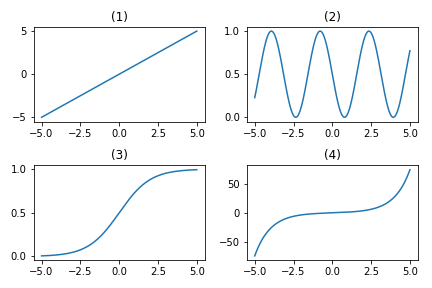

ans : 3

> That's right! The function in the picture is fairly similar to the logistic function used by logistic regression.

**Regularization and probabilities**

In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.

- Compute the maximum predicted probability.
- Run the provided code and take a look at the plot.

In [21]:
X = pd.read_csv('./dataset/binary_X.csv').to_numpy()
y = pd.read_csv('./dataset/binary_y.csv').to_numpy().ravel()

In [25]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [26]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [27]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


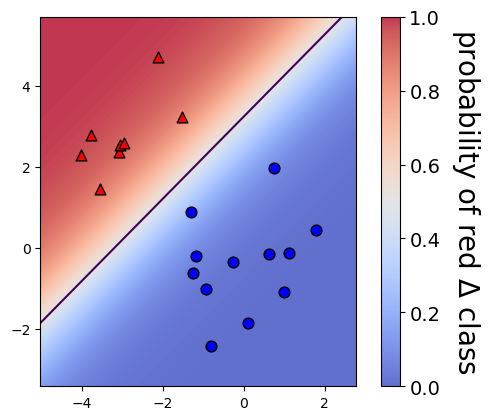

Maximum predicted probability 0.9973143426900802


In [28]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X, y)
plot_classifier(X, y, model, proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


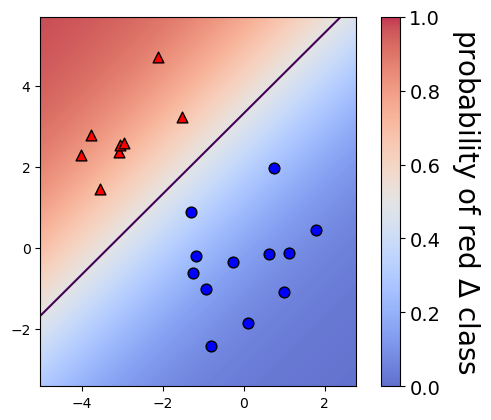

Maximum predicted probabilty 0.9352061680350906


In [29]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X, y)
plot_classifier(X, y, model, proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probabilty", np.max(prob))

 > You got it! As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!

**Visualizing easy and difficult examples**

In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

- Fill in the first blank with the index of the digit that the model is most confident about.
- Fill in the second blank with the index of the digit that the model is least confident about.
- Observe the images: do you agree that the first one is less ambiguous than the second?

In [30]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', 
               vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
        plt.show()

In [31]:
X, y = digits.data, digits.target

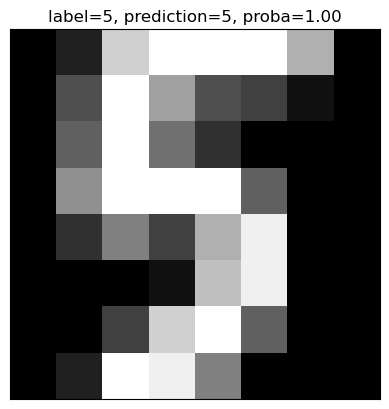

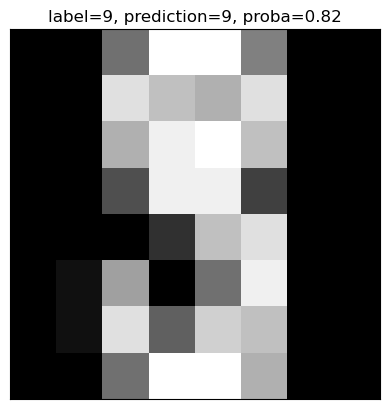

In [32]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X, y)

# Get predicted probabilties
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probabilty
proba_inds = np.argsort(np.max(proba, axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

> Great job! As you can see, the least confident example looks like a weird 9, and the most confident example looks like a very typical 5.

### Multiclass Logistic Regression

Regresi logistik multikelas (multi-class logistic regression) adalah salah satu teknik dalam pembelajaran mesin yang digunakan untuk menangani masalah klasifikasi ketika ada lebih dari dua kelas yang mungkin sebagai output. Tujuan dari regresi logistik multikelas adalah memprediksi kelas atau label yang paling mungkin untuk diberikan data input.

ada dua pendekatan populer dalam multiclass ini,

**1. One-vs-Rest**

One-vs-Rest (OvR), juga dikenal sebagai One-vs-All (OvA), adalah teknik yang digunakan dalam klasifikasi multikelas untuk mengubah masalah klasifikasi multikelas menjadi sejumlah masalah klasifikasi biner yang lebih sederhana. Dengan pendekatan ini, model klasifikasi biner dibuat untuk setiap kelas yang mungkin, dan kemudian kelas mana pun dengan skor tertinggi diambil sebagai prediksi akhir. Berikut adalah penjelasan singkat tentang bagaimana One-vs-Rest bekerja:

- Masalah Multikelas: Dalam masalah klasifikasi multikelas, Anda memiliki tiga atau lebih kelas yang mungkin sebagai output (misalnya, "Merah," "Hijau," "Biru"). Tujuannya adalah memprediksi kelas mana yang paling sesuai untuk setiap data input.

- Pendekatan One-vs-Rest: Dalam pendekatan One-vs-Rest, Anda membuat model klasifikasi biner terpisah untuk setiap kelas. Artinya, Anda menganggap satu kelas sebagai positif (misalnya, "Merah") dan semua kelas lainnya sebagai negatif (misalnya, "Hijau" dan "Biru"). Anda melakukan ini secara berulang untuk setiap kelas yang mungkin. Setelahnya, Anda memiliki satu model untuk setiap kelas.

- Pelatihan: Untuk setiap model klasifikasi biner, Anda melatihnya menggunakan data pelatihan. Model ini akan belajar untuk membedakan antara kelas yang dipilih sebagai positif dan kelas negatif yang lainnya.

- Prediksi: Ketika Anda ingin membuat prediksi pada data baru, Anda melewati data tersebut melalui setiap model. Setiap model memberikan skor (nilai numerik) yang menunjukkan sejauh mana data tersebut cocok dengan kelas yang diwakili oleh model tersebut. Model dengan skor tertinggi menentukan kelas yang diprediksi.

- Prediksi Akhir: Setelah model-model individu memberikan skor, Anda memilih kelas dengan skor tertinggi sebagai prediksi akhir. Ini adalah kelas yang model individu yakini paling sesuai dengan data tersebut.

Keuntungan dari pendekatan One-vs-Rest adalah kesederhanaannya. Ini memungkinkan penggunaan model klasifikasi biner yang sudah ada untuk menangani masalah klasifikasi multikelas. Namun, pendekatan ini dapat menyebabkan masalah jika kelas yang dipilih sebagai positif terlalu mirip atau tumpang tindih satu sama lain. Dalam kasus seperti itu, metode lain seperti softmax regression mungkin lebih sesuai.

Pendekatan ini umumnya digunakan dalam berbagai algoritma klasifikasi, seperti regresi logistik multikelas, Support Vector Machines (SVM), dan lainnya.







**2. Softmax atau Multinominal**

Softmax adalah sebuah fungsi yang digunakan untuk mengubah sejumlah nilai numerik (biasanya disebut skor atau logit) menjadi distribusi probabilitas atas beberapa kelas yang mungkin. Fungsi softmax sangat umum digunakan dalam klasifikasi multikelas, termasuk dalam jaringan saraf tiruan (neural networks) dan berbagai model klasifikasi lainnya. Berikut penjelasan singkat tentang cara softmax bekerja:

- Input Skor: Softmax mengambil sejumlah nilai input numerik yang disebut skor. Setiap skor biasanya sesuai dengan seberapa sesuai atau mungkin data masukan dengan suatu kelas. Misalnya, dalam klasifikasi gambar, skor mungkin mencerminkan sejauh mana gambar cocok dengan kelas "kucing," "anjing," "burung," dan sebagainya.

- Transformasi Eksponensial: Setiap skor diubah dengan fungsi eksponensial. Ini dilakukan untuk meningkatkan perbedaan antara skor yang lebih besar dan yang lebih kecil. Operasi ini juga memastikan bahwa semua nilai output softmax adalah positif.

- Normalisasi: Hasil dari langkah sebelumnya di-normalisasi dengan menjumlahkannya semua. Ini menghasilkan probabilitas untuk setiap kelas yang mungkin. Probabilitas ini mengukur sejauh mana data masukan cocok dengan setiap kelas dan selalu berjumlah satu, yang merupakan karakteristik penting dari distribusi probabilitas.

- Probabilitas Kelas: Setelah normalisasi, Anda memiliki probabilitas untuk setiap kelas sebagai output softmax. Kelas dengan probabilitas tertinggi dianggap sebagai prediksi akhir.

Rumus matematis untuk softmax dalam kasus kelas-kelas yang mungkin adalah sebagai berikut:

     *Softmax(x)_i = e^(x_i) / Σ(e^(x_j)) untuk j = 1 hingga J

Di mana:

    - Softmax(x)_i adalah probabilitas kelas ke-i.
    - x_i adalah skor kelas ke-i.
    - e adalah basis eksponensial (sekitar 2.71828).
    - J adalah jumlah kelas yang mungkin.
    
Keuntungan penggunaan softmax adalah bahwa ia menghasilkan distribusi probabilitas yang cocok dengan data masukan. Ini membuatnya sangat berguna dalam masalah klasifikasi multikelas, di mana Anda ingin mengetahui sejauh mana data masukan cocok dengan masing-masing kelas yang mungkin. Softmax juga sering digunakan sebagai lapisan akhir dalam jaringan saraf tiruan yang digunakan dalam tugas-tugas klasifikasi.






### Perbedaan antara kedunaya

- One-vs-Rest
    - pemodelan klasifikasi biner pada tiap kelas
    - memprediksi keseluruhan, dan mengambil nilai terbesar
    - mudah digunakan dan modular
    - tidak dapat secara langusng optimasi evaluasi model
    - umum digunakan untuk SVM
    - dapat menghasilkan probabilitas
    
- Multinominal dan Softmax
    - pemodelan sebuah klasifikasi untuk semua kelas 
    - memprediksi secara langusng kelas terbaik
    - lebih kompleks
    - menyelesaikan masalah secara cepat
    - kurang umum digunakan untuk SVM
    - dapat menghasilkan probabilitas

### Exercise 

**Counting the coefficients**

If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts?

ans : 303

> Nicely done! Feel free to test this out with scikit-learn!

**Fitting multi-class logistic regression**

In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into X_train, y_train, X_test, and y_test.

- Fit a one-vs-rest logistic regression classifier by setting the multi_class parameter and report the results.
- Fit a multinomial logistic regression classifier by setting the multi_class parameter and report the results.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [35]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class="ovr")
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OVR training accuracy: 0.9962880475129918
OVR test accuracy    : 0.96
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9622222222222222


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> Nice work! As you can see, the accuracies of the two methods are fairly similar on this data set.

**Visualizing multi-class logistic regression**

In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.

The data set is loaded into X_train and y_train. The two logistic regression objects,lr_mn and lr_ovr, are already instantiated (with C=100), fit, and plotted.

Notice that lr_ovr never predicts the dark blue class… yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

- Create a new logistic regression object (also with C=100) to be used for binary classification.
- Visualize this binary classifier with plot_classifier… does it look reasonable?

In [36]:
X_train = pd.read_csv('./dataset/toy_X_train.csv').to_numpy()
y_train = pd.read_csv('./dataset/toy_y_train.csv').to_numpy().ravel()

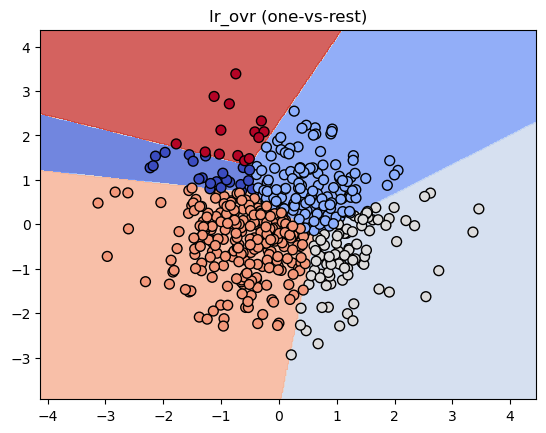

In [37]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter=10000, C=100)
lr_ovr.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_ovr (one-vs-rest)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

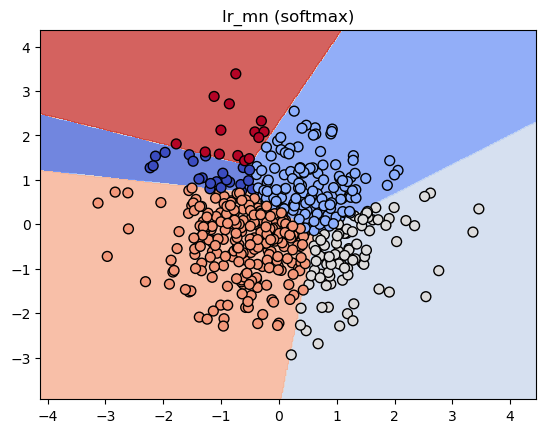

In [38]:
# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_mn (softmax)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

Softmax training accuracy: 0.952
One-vs-rest training accuracy: 0.996


C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


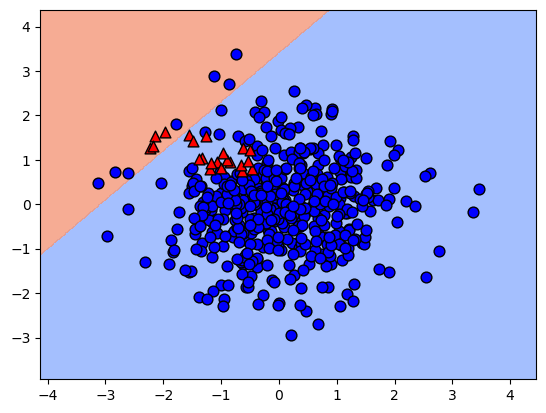

In [39]:
# Print training accuracies
print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(max_iter=10000, C=100)
lr_class_1.fit(X_train, y_train == 1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train == 1, lr_class_1);

> Nice work! As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

**One-vs-rest SVM**

As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into X_train, y_train, X_test, and y_test .

Instead of using LinearSVC, we'll now use scikit-learn's SVC object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.

- Fit an SVC called svm_class_1 to predict class 1 vs. other classes.
- Plot this classifier.

In [40]:
X_test = pd.read_csv('./dataset/toy_X_test.csv').to_numpy()
y_test = pd.read_csv('./dataset/toy_y_test.csv').to_numpy().ravel()

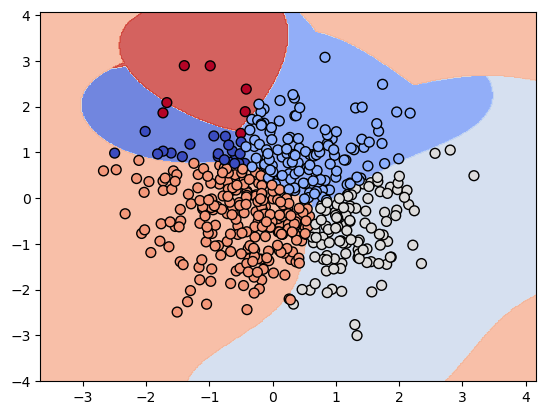

In [41]:
from sklearn.svm import SVC

# Create/plot the binary classifier
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train)
plot_classifier(X_test, y_test, svm_class_1)

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_3068\975142573.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


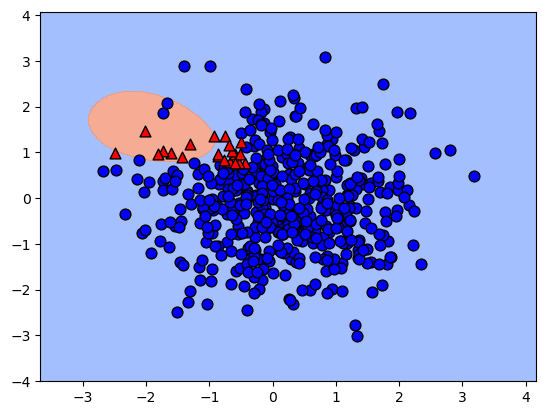

In [42]:
# Create/plot the binary classifier
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train == 1)
plot_classifier(X_test, y_test == 1, svm_class_1)

> Cool, eh?! The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.